<a href="https://colab.research.google.com/github/fsona/covidoutbreak/blob/master/Covid_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import pandas for handling data frames
import pandas as pd
# import seaborn to get sample datasets
import seaborn as sns
# import matplotlib to get basic plot function
#import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# import numpy to get advanced plot functions
import numpy as np


In [0]:
# Read data per province from Github repository of Protezione Civile
df=pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",sep=',')

In [0]:
# import datetime and dates to convert string to timestamap 
from datetime import datetime
from matplotlib.dates import date2num
# cast str data type to column 'data'
df['data']=df['data'].astype('str')
# transform 'data' text string into timestamp
df['data']=df['data'].apply(datetime.strptime, args=("%Y-%m-%dT%H:%M:%S",))
# take out wrong data
df=df[df.denominazione_provincia.str.contains('In fase di definizione/aggiornamento')==False]

In [105]:
# define a string with the target region I want the data per province plotted , can be any of the unique "denominazione_regione'
regtarget='Lombardia'
# extract (and show) the unique list of provinces in the target region
provincie=df[df.denominazione_regione.str.contains(regtarget)].denominazione_provincia.unique()
provincie

array(['Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi',
       'Mantova', 'Milano', 'Monza e della Brianza', 'Pavia', 'Sondrio',
       'Varese'], dtype=object)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

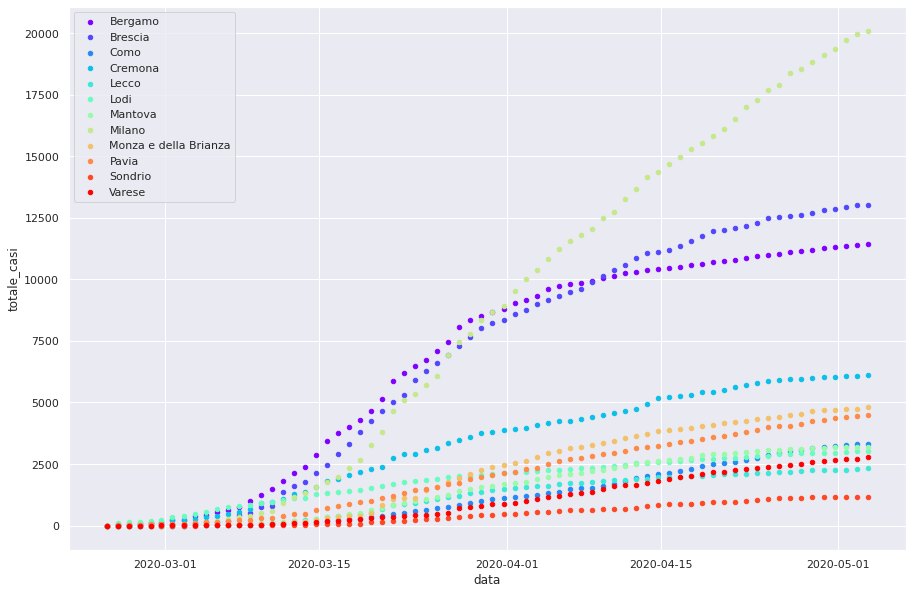

In [116]:
sns.set()
#create a color array
colors = cm.rainbow(np.linspace(0, 1, len(provincie)))
# create the figure for multiple subplot
fig = plt.figure()
ax = fig.add_subplot(111)
#loop to plot all the datasaet on the same graph (first one is plotted twice, see row above)
for elem, c in zip(provincie,colors):
    df2=df[df.denominazione_provincia.str.contains(elem)]
    df2.plot.scatter(x='data',y='totale_casi',color=c , ax=ax, figsize=(15,10), label=elem)
 